In [ ]:
# df.plot(kind='scatter', x='column1', y='column2')
# shows corelelation between multiple variables

In [ ]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\Data Analysis And Automation\Sample Data\data_jobs.csv")
df.head()

# cleaning the dataset
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [ ]:
df = df[df['job_title_short'] == 'Data Analyst']

In [ ]:
# explode skills and drop rows with missing skills
df_exploded = df.explode('job_skills').dropna(subset=['job_skills'])

# normalize skill strings (optional but useful)
df_exploded['job_skills'] = df_exploded['job_skills'].astype(str).str.strip().str.lower()

# use the existing salary column name 'salary_year_avg' for median calculation
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)
print(skill_stats)


            skill_count  median_salary
job_skills                            
sql               92428        92500.0
excel             66860        84479.0
python            57190        98500.0
tableau           46455        95000.0
power bi          39380        90000.0
r                 29996        92527.5
sas               27998        90000.0
powerpoint        13822        85000.0
word              13562        80000.0
sap               11280        90000.0


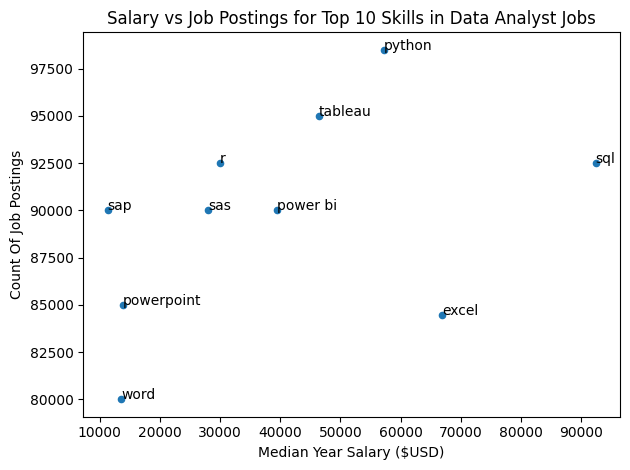

In [ ]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.ylabel('Count Of Job Postings')
plt.xlabel('Median Year Salary ($USD)')
plt.title('Salary vs Job Postings for Top 10 Skills in Data Analyst Jobs')
plt.tight_layout()
# to display the texts on the plot, ref matplotlib.pyplot.text()
# parse in for loop to show skill names on the plot
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.show()